Nama           : Syahrani Adrianty
***
ID Participant : 04125
***
Track          : Data Science
***
Kompi          : F
***
Dataset        : Heart Disease

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##**Quality of the dataset**

Cek Missing Value

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Cek Duplikat

In [ ]:
distinct_count = len(data.drop_duplicates())
duplicate_count = len(data) - distinct_count
f'{distinct_count} distinct rows and {duplicate_count} duplicated rows'

'302 distinct rows and 723 duplicated rows'

Cek Outliers

<Axes: >

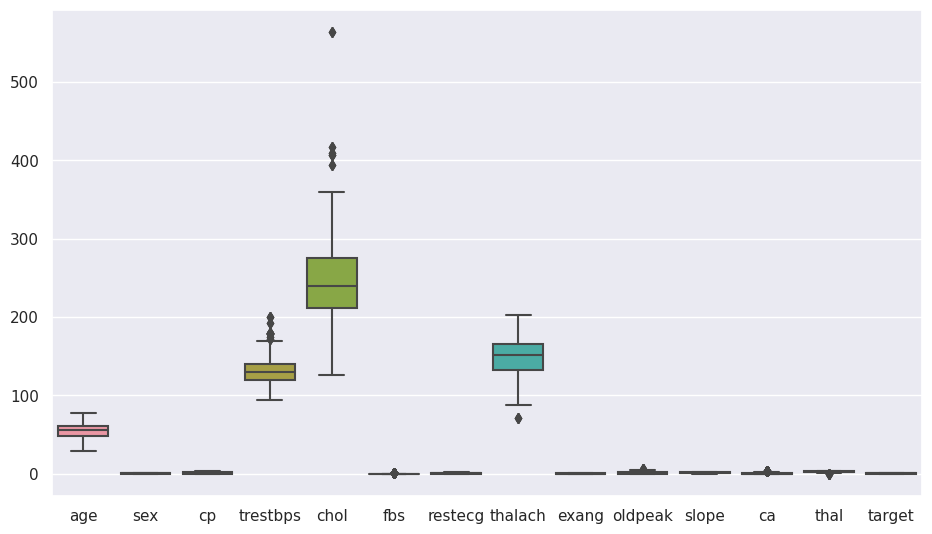

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.boxplot(data)

<Axes: >

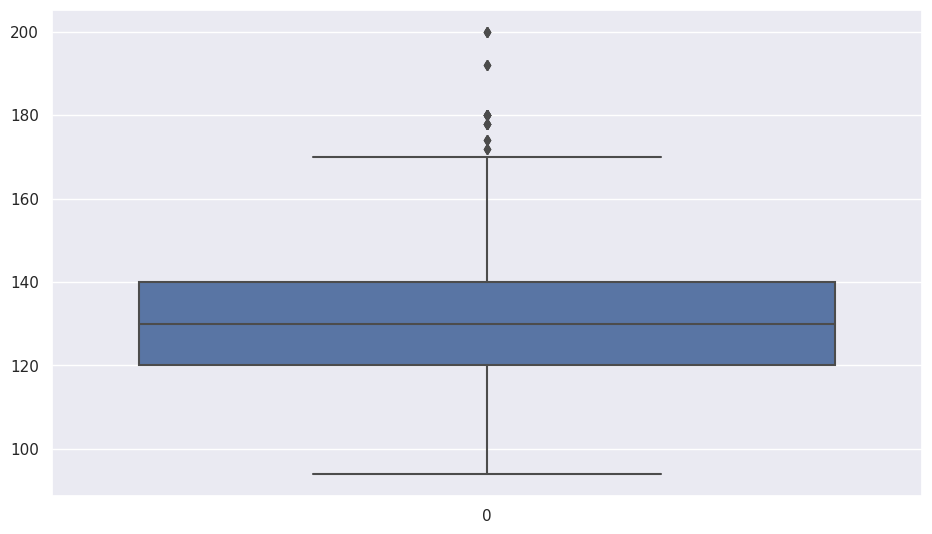

In [ ]:
sns.boxplot(data['trestbps'])

<Axes: >

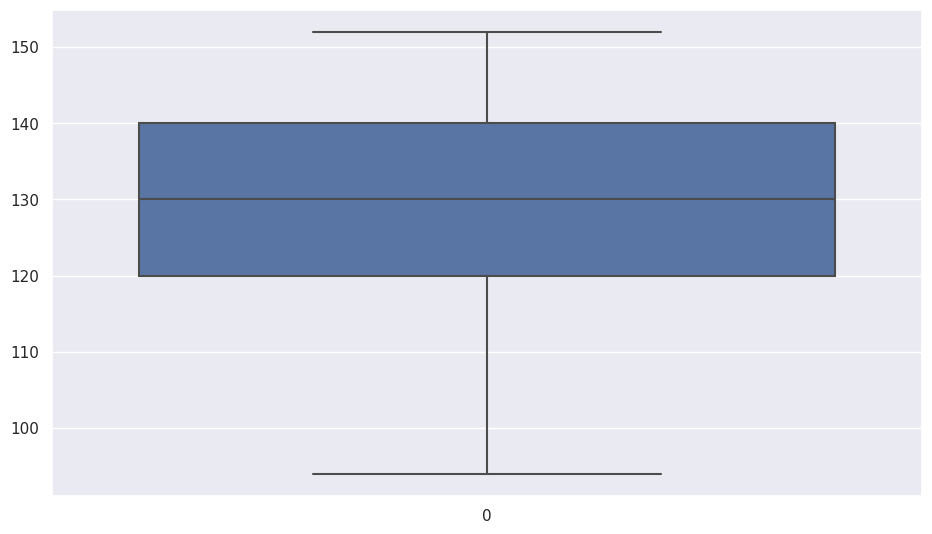

In [ ]:
#Handling outlier di trestbps
median=data.loc[data['trestbps']>140, 'trestbps'].median()
data['trestbps']=np.where(data['trestbps']>140, median, data['trestbps'])
sns.boxplot(data['trestbps'])

<Axes: >

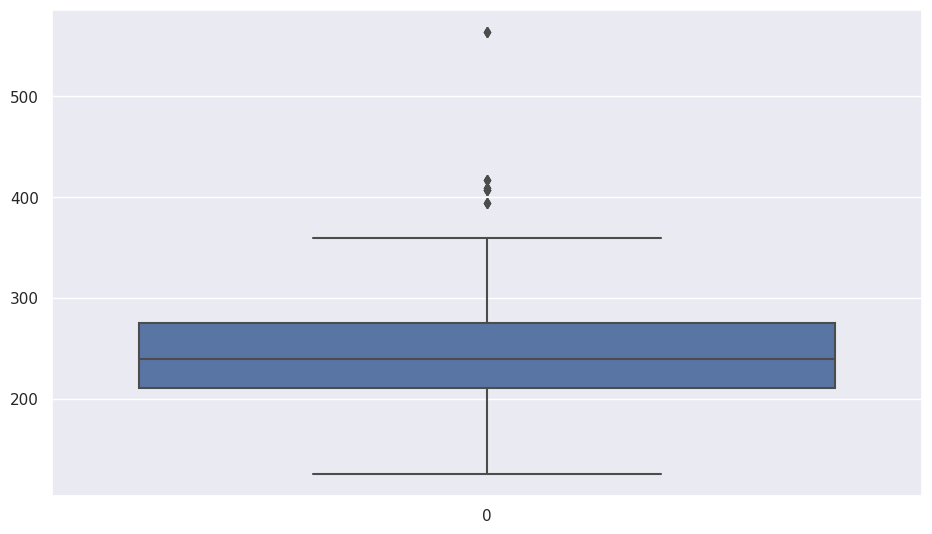

In [ ]:
sns.boxplot(data['chol'])

<Axes: >

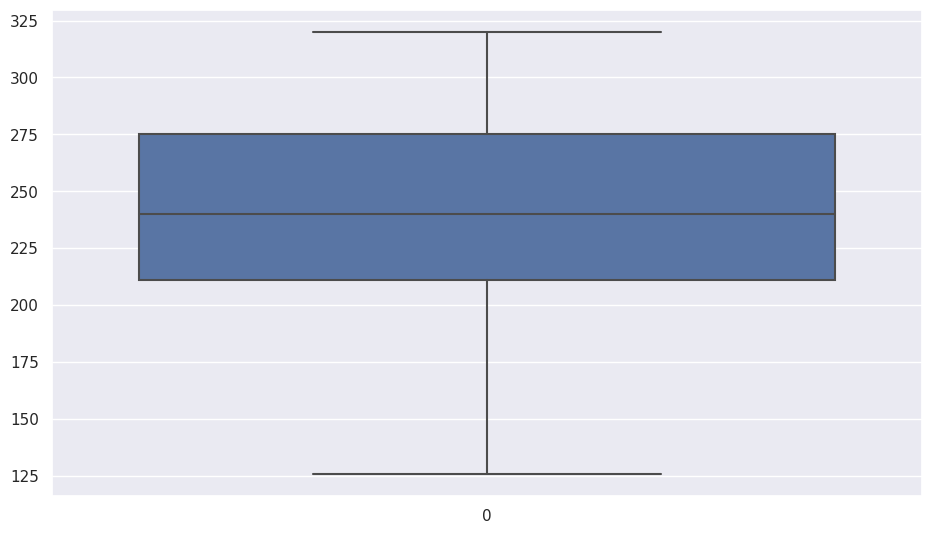

In [ ]:
#Handling outlier di chol
median=data.loc[data['chol']>300, 'chol'].median()
data['chol']=np.where(data['chol']>300, median, data['chol'])
sns.boxplot(data['chol'])

Cek Data Imbalance

In [ ]:
print(data['target'].value_counts())

1    526
0    499
Name: target, dtype: int64


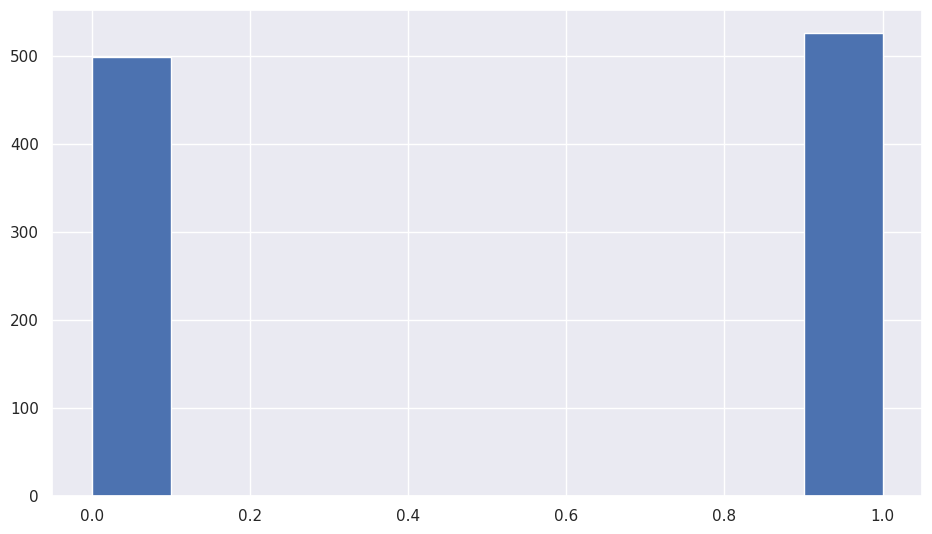

In [ ]:
plt.hist(data['target'])
plt.show()

##**Descriptive statistics of the dataset**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,130.507317,244.113171,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,14.870870,45.575710,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,152.000000,320.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data[continuous_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,130.507317,244.113171,149.114146,1.071512
std,9.072290,14.870870,45.575710,23.005724,1.175053
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.800000
max,77.000000,152.000000,320.000000,202.000000,6.200000


##**Correlation between features**

<Axes: >

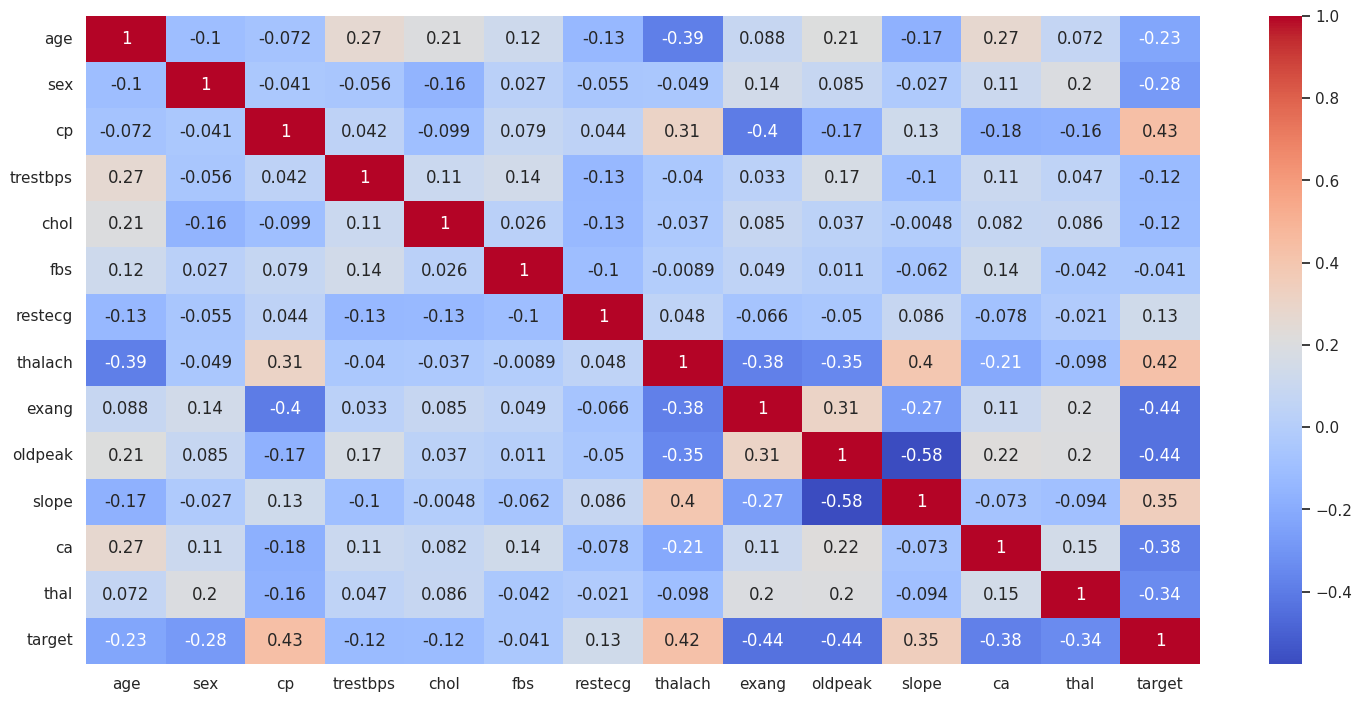

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

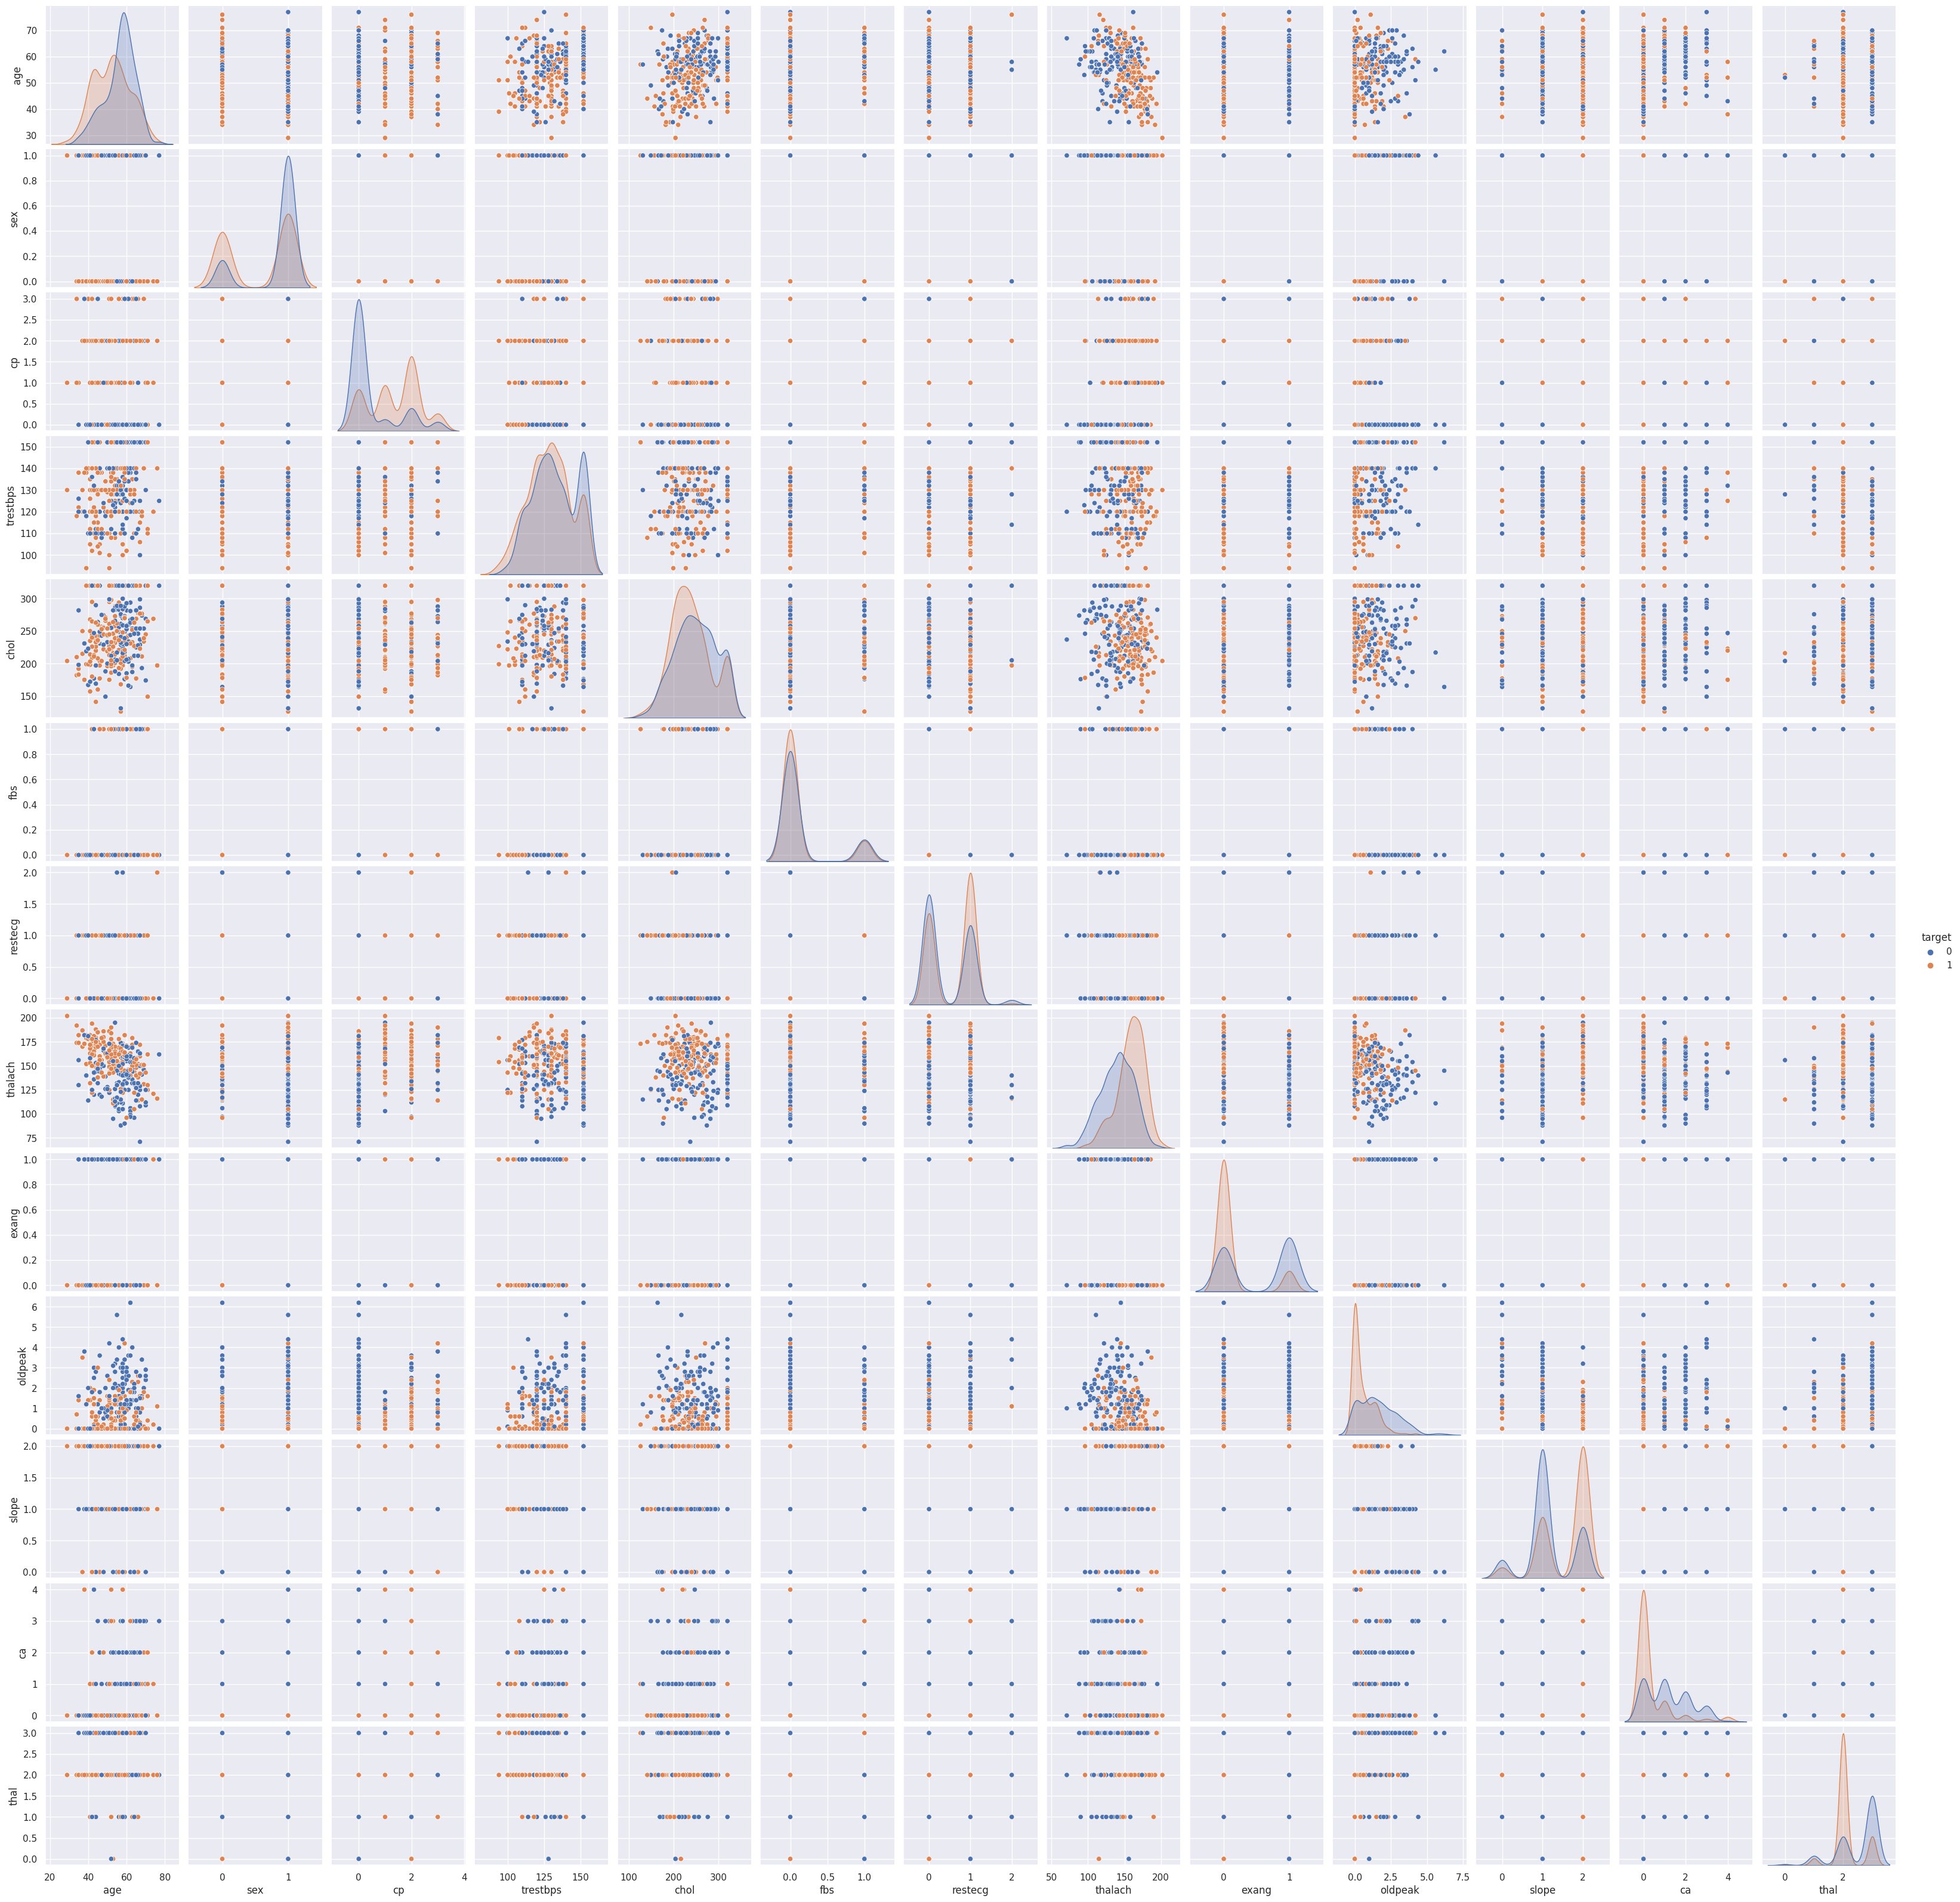

In [ ]:
sns.pairplot(data, hue='target')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

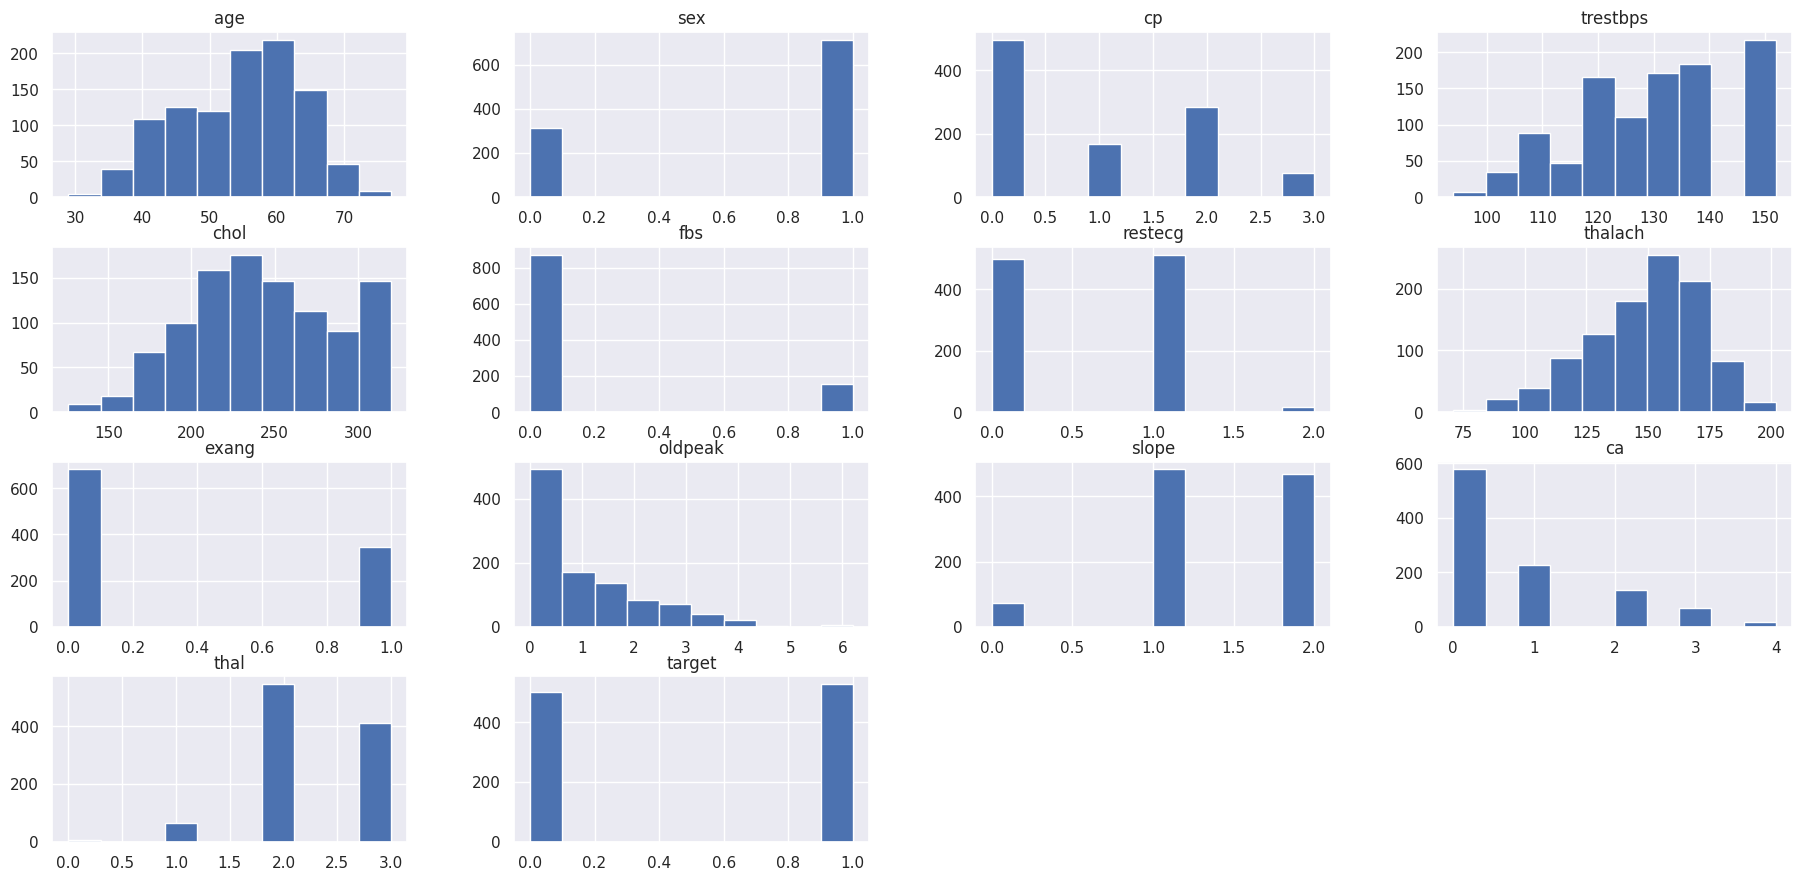

In [ ]:
data.hist(figsize=(20,10))

##**Feature engineering**

In [ ]:
data['age_categories'] = pd.cut(data['age'], bins=[0, 40, 60, np.inf], labels=['young', 'middle-aged', 'elderly'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_categories
0,52,1,0,125.0,212.0,0,1,168,0,1.0,2,2,3,0,middle-aged
1,53,1,0,140.0,203.0,1,0,155,1,3.1,0,0,3,0,middle-aged
2,70,1,0,152.0,174.0,0,1,125,1,2.6,0,0,3,0,elderly
3,61,1,0,152.0,203.0,0,1,161,0,0.0,2,1,3,0,elderly
4,62,0,0,138.0,294.0,1,1,106,0,1.9,1,3,2,0,elderly


In [ ]:
data['trestbps_categories'] = pd.cut(data['trestbps'], bins=[0, 120, 140, np.inf], labels=['normal', 'pre-hypertension', 'hypertension'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_categories,trestbps_categories
0,52,1,0,125.0,212.0,0,1,168,0,1.0,2,2,3,0,middle-aged,pre-hypertension
1,53,1,0,140.0,203.0,1,0,155,1,3.1,0,0,3,0,middle-aged,pre-hypertension
2,70,1,0,152.0,174.0,0,1,125,1,2.6,0,0,3,0,elderly,hypertension
3,61,1,0,152.0,203.0,0,1,161,0,0.0,2,1,3,0,elderly,hypertension
4,62,0,0,138.0,294.0,1,1,106,0,1.9,1,3,2,0,elderly,pre-hypertension


In [ ]:
data['chol_categories'] = pd.cut(data['chol'], bins=[0, 200, 240, np.inf], labels=['normal', 'moderate', 'high'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_categories,trestbps_categories,chol_categories
0,52,1,0,125.0,212.0,0,1,168,0,1.0,2,2,3,0,middle-aged,pre-hypertension,moderate
1,53,1,0,140.0,203.0,1,0,155,1,3.1,0,0,3,0,middle-aged,pre-hypertension,moderate
2,70,1,0,152.0,174.0,0,1,125,1,2.6,0,0,3,0,elderly,hypertension,normal
3,61,1,0,152.0,203.0,0,1,161,0,0.0,2,1,3,0,elderly,hypertension,moderate
4,62,0,0,138.0,294.0,1,1,106,0,1.9,1,3,2,0,elderly,pre-hypertension,high


In [ ]:
data['thalach_categories'] = pd.cut(data['thalach'], bins=[0, 120, 140, 160, np.inf], labels=['low', 'normal', 'high', 'very high'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_categories,trestbps_categories,chol_categories,thalach_categories
0,52,1,0,125.0,212.0,0,1,168,0,1.0,2,2,3,0,middle-aged,pre-hypertension,moderate,very high
1,53,1,0,140.0,203.0,1,0,155,1,3.1,0,0,3,0,middle-aged,pre-hypertension,moderate,high
2,70,1,0,152.0,174.0,0,1,125,1,2.6,0,0,3,0,elderly,hypertension,normal,normal
3,61,1,0,152.0,203.0,0,1,161,0,0.0,2,1,3,0,elderly,hypertension,moderate,very high
4,62,0,0,138.0,294.0,1,1,106,0,1.9,1,3,2,0,elderly,pre-hypertension,high,low


In [ ]:
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_cols)

In [ ]:
data.head()

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,0,168,1.0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,1,155,3.1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,0,125,2.6,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,0,161,0.0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,1,106,1.9,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


##**Scaling the data**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x = data.drop('target', axis=1)

In [ ]:
x_scaled = scaler.fit_transform(x)

##**the hypothesis from the models**

**Age**

H0 : Tidak ada hubungan usia dengan variabel target yang mempengaruhi resiko terkena penyakit jantung

H1 : Terdapat hubungan usia dengan variabel target yang mempengaruhi resiko terkena penyakit jantung
***
**Trestbps**

H0 : Tidak ada hubungan tekanan darah dengan variabel target yang mempengaruhi resiko terkena penyakit jantung

H1 : Terdapat hubungan tekanan darah dengan variabel target yang mempengaruhi resiko terkena penyakit jantung
***
**Chol**

H0 : Tidak ada hubungan kadar kolesterol dengan variabel target yang mempengaruhi resiko terkena penyakit jantung

H1 : Terdapat hubungan kadar kolesterol dengan variabel target yang mempengaruhi resiko terkena penyakit jantung
***
**Sex**

H0 : Tidak ada hubungan jenis kelamin dengan variabel target yang mempengaruhi resiko terkena penyakit jantung

H1 : Terdapat hubungan jenis kelamin dengan variabel target yang mempengaruhi resiko terkena penyakit jantung

##**Choose at least 2 models from the live session**

- Random Forest

  beneficial :
  - Random Forest yaitu algoritma ensemble yang terdiri dari banyak pohon keputusan yang memungkinkan model untuk membuat prediksi dengan akurasi yang tinggi dan menghindari overfitting.
  - Random Forest dapat memberikan informasi tentang fitur mana yang paling penting dalam membuat prediksi yang dapat membantu memahami faktor-faktor yang memengaruhi risiko penyakit jantung.

- Logistic Regression

  beneficial :
  - Model logistic regression dapat diinterpretasikan dengan mudah karena hasilnya berupa koefisien yang menunjukkan pengaruh variabel input terhadap variabel output.
  - Model logistic regression cenderung lebih stabil daripada model yang lebih kompleks. Hal ini karena model logistic regression cenderung menghindari overfitting pada dataset.

##**Model Evaluation**

Cross Validation for Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']

In [ ]:
rf = RandomForestClassifier()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(205, 13)
(205,)


In [ ]:
scores = cross_val_score(rf, x, y, cv=5)

In [ ]:
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.99 with standard deviation 0.01


Berdasarkan akurasi dari cross validation di model random forest menghasilkan akurasi dengan nilai 0.99 yang menunjukkan bahwa model Random Forest memiliki tingkat akurasi yang sangat tinggi dan memiliki kemampuan untuk memprediksi data yang tidak dilihat sebelumnya dengan tingkat keakuratan yang tinggi. Tetapi tidak hanya bergantung pada akurasi cross validation aja, sehingga dapat memeriksa lebih lanjut untuk melihat hasil evaluasi metrics lainnya, seperti F1-score presisi, dan recall.

Cross Validation for Logistic Regression

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
scores = cross_val_score(logreg, x, y, cv=5)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

In [ ]:
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.84 with standard deviation 0.03


Berdasarkan akurasi dari cross validation di model logistic regression menghasilkan akurasi dengan nilai 0.84 yang menunjukkan bahwa model logistic regression memiliki tingkat akurasi yang cukup tinggi dan memiliki kemampuan untuk memprediksi data dengan tingkat keakuratan yang cukup tinggi. Tetapi tidak hanya bergantung pada akurasi cross validation aja, sehingga dapat memeriksa lebih lanjut untuk melihat hasil evaluasi metrics lainnya, seperti F1-score presisi, dan recall.

Bootstrapping for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [ ]:
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    indices = np.random.choice(range(len(x_scaled)), size=len(y), replace=True)
    X_boot = x_scaled[indices]
    y_boot = y[indices]

    rf.fit(X_boot, y_boot)

    accuracy = rf.score(x_scaled, y)
    accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    lower_ci = mean_accuracy - 1.96 * std_accuracy
    upper_ci = mean_accuracy + 1.96 * std_accuracy

In [ ]:
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.93
95% confidence interval: [0.91, 0.94]


Berdasarkan hasil dari bootstraping di model random forest menghasilkan nilai akurasi mean yaitu 0.94 dengan interval confidence yaitu 0.92, 0.96



Bootstrapping for Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np

In [ ]:
logreg = LogisticRegression()

In [ ]:
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    indices = np.random.choice(range(len(x_scaled)), size=len(y), replace=True)
    X_boot = x_scaled[indices]
    y_boot = y[indices]

    logreg.fit(X_boot, y_boot)

    accuracy = logreg.score(x_scaled, y)
    accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    lower_ci = mean_accuracy - 1.96 * std_accuracy
    upper_ci = mean_accuracy + 1.96 * std_accuracy

In [ ]:
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.85
95% confidence interval: [0.83, 0.87]


Berdasarkan hasil dari bootstraping di model logistic regression menghasilkan nilai akurasi mean yaitu 0.85 dengan interval confidence yaitu 0.83, 0.86

##**Create at least 2 models**

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=SEED)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=3, random_state=42)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix: ", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:  [[83 19]
 [ 8 95]]
Accuracy: 0.8682926829268293
Precision: 0.8333333333333334
Recall: 0.9223300970873787
F1-score: 0.8755760368663594


Berdasarkan model random forest diatas menghasilkan evaluasi metrics berupa accuracy dengan nilai 0.86 dan F1-score yaitu 0.87 yang menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan presisi dan recall yang tinggi yaitu presisi dengan nilai 0.83 dan recall yaitu 0.92. Lalu dapat di lihat dari hasil confusion matrix yaitu [83 19] [8 95].

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)


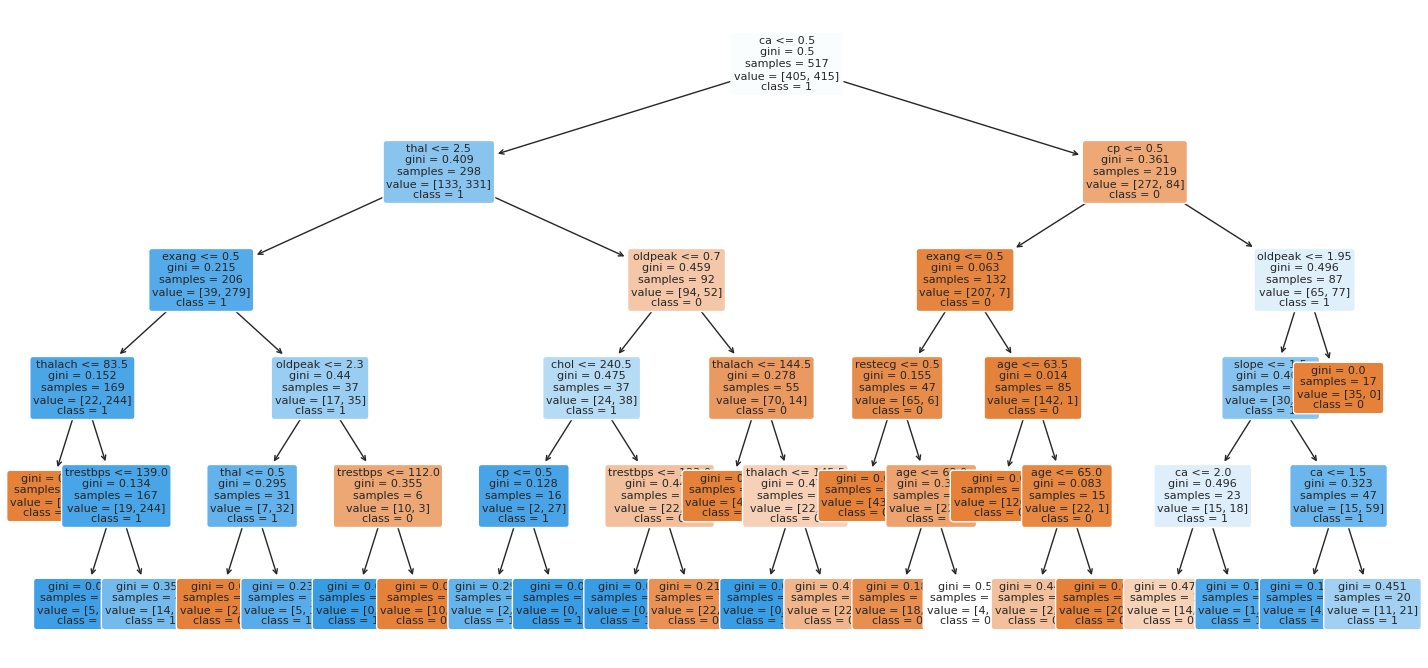

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)


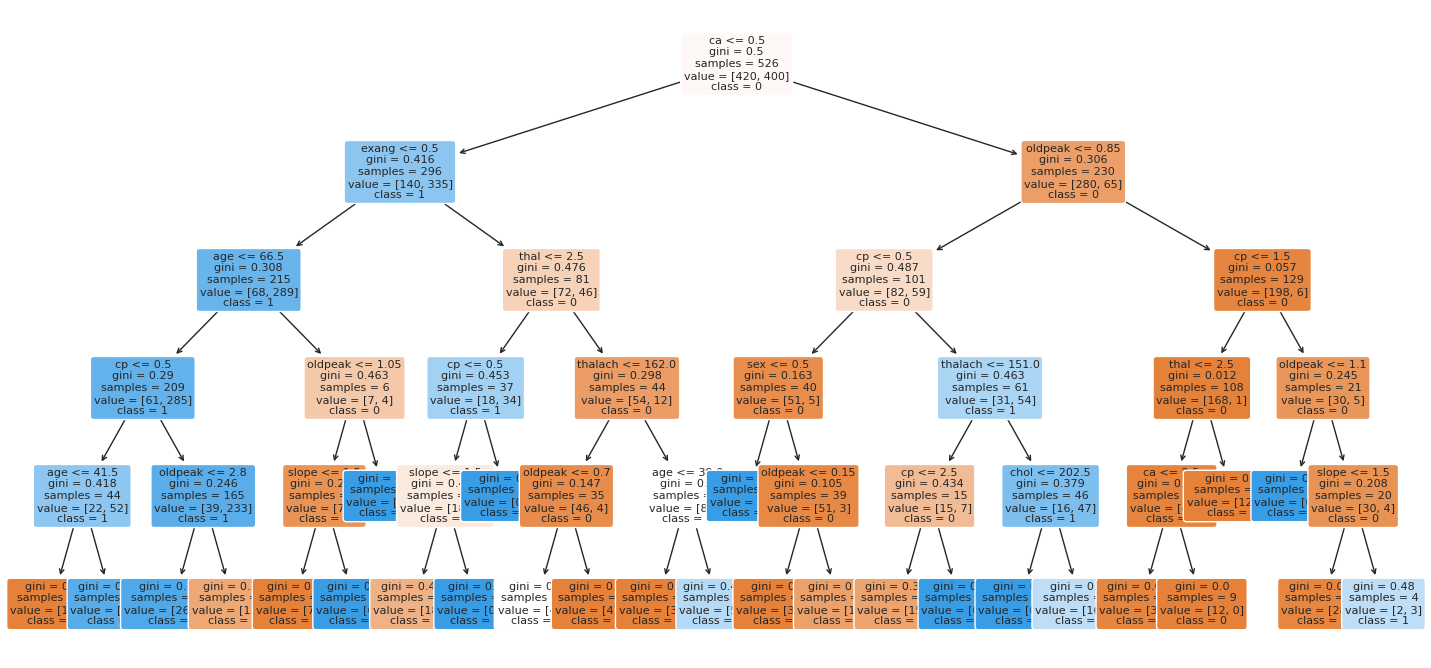

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)


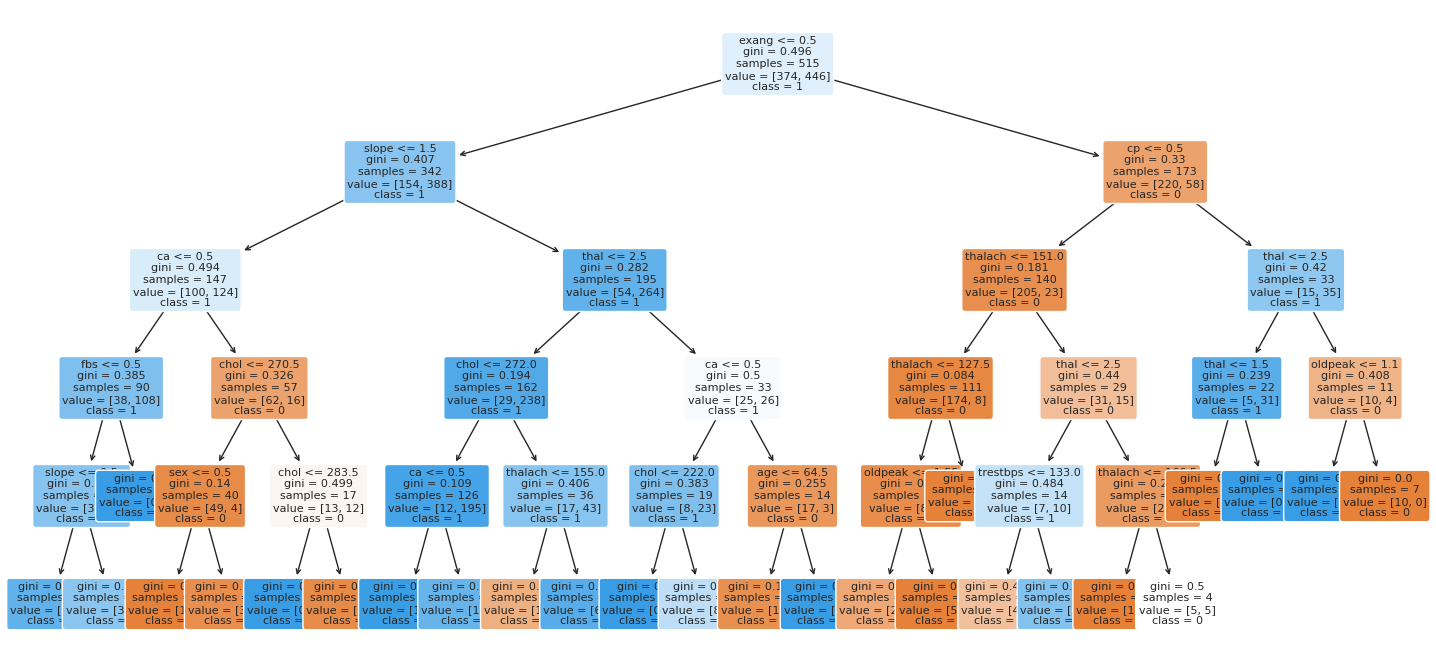

In [ ]:
from sklearn import tree

features = x.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class

for estimator in rf.estimators_:
    print(estimator)
    plt.figure(figsize=(16,8))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix: ", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:  [[75 27]
 [10 93]]
Accuracy: 0.8195121951219512
Precision: 0.775
Recall: 0.9029126213592233
F1-score: 0.8340807174887893


Berdasarkan model logistic regression diatas menghasilkan evaluasi metrics berupa accuracy dengan nilai 0.81 dan F1-score yaitu 0.83 yang menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan presisi dan recall yang cukup tinggi yaitu presisi dengan nilai 0.77 dan recall yaitu 0.90. Lalu dapat di lihat dari hasil confusion matrix yaitu [75 27] [10 93].

##**Feature importance**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
print(f"""R^2 Training Score: {rf.score(x_train, y_train):.2f}
OOB Score: {rf.oob_score_:.2f}
R^2 Validation Score: {rf.score(x_valid, y_valid):.2f}""")

R^2 Training Score: 0.99
OOB Score: 0.96
R^2 Validation Score: 0.93


In [ ]:
base_imp = imp_df(x_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,cp,0.229009
1,thal,0.165247
2,ca,0.142593
3,oldpeak,0.103548
4,thalach,0.080162
5,age,0.075995
6,chol,0.072585
7,trestbps,0.043008
8,slope,0.034076
9,sex,0.019498


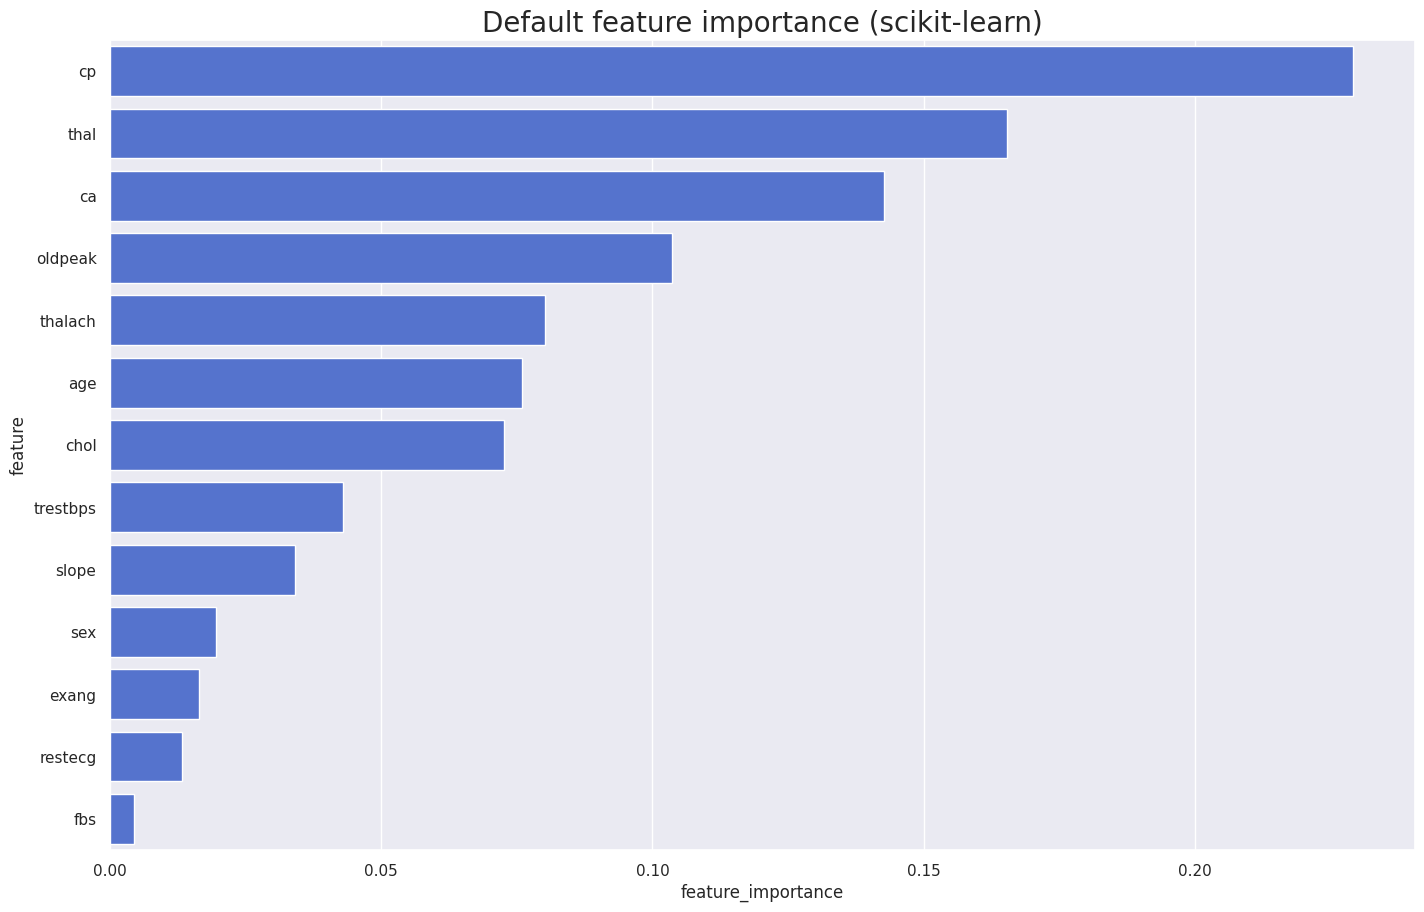

In [ ]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

***
**Insight**
***

Berdasarkan hasil feature importance menunjukkan adanya fitur yang paling berpengaruh terhadap model yaitu pertama terdapat fitur cp dengan nilai 0.22, lalu kedua fitur thal dengan nilai 0.16, dan ketiga fitur ca dengan nilai 0.14. Selanjutnya fitur-fitur yang lainnya seperti :

0	cp   -->  0.227494

1	thal -->  0.164424

2	ca	--> 0.140246

3	oldpeak	--> 0.103663

4	chol --> 0.084014

5	thalach	 --> 0.074856

6	age	 --> 0.071283

7	trestbps --> 0.054794

8	slope	--> 0.031755

9	sex	--> 0.016604

10 exang --> 0.014396

11 restecg --> 0.012302

12 fbs --> 0.004168

##**Compare and contrast the several models you have created for the last assignment**

Membandingkan 2 model yang sudah dibuat yaitu membandingkan model random forest dengan model logistic regression melalui evaluasi matrix.


- Model Random Forest menghasilkan evaluasi matrix berupa nilai accuracy sebesar 0.86, precision sebesar 0.83, recall sebesar 0.92, dan F1-score sebesar 0.87. Di lihat dari nilai accuracy dan F1-score yang cukup tinggi menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan precision dan recall yang tinggi.

- Model Logistic Regression menghasilkan evaluasi matrix berupa nilai accuracy sebesar 0.81, precision sebesar 0.77, recall sebesar 0.90, dan F1-score sebesar 0.83. Di lihat dari nilai accuracy dan F1-score yang cukup tinggi menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan precision dan recall yang cukup tinggi.

##**Hyperparameter Tuning**

Hyperparameter Tuning Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparameter_space = {
"n_estimators": [25,50,100],
"criterion": ["gini", "entropy"],
"class_weight": ["balanced","balanced_subsample"],
"min_samples_split": [0.1, 0.5, 1.0],
}

In [ ]:
# Initiate the model
rf = RandomForestClassifier(random_state=0)

# Initiate the Grid Search Class
clf = GridSearchCV(rf, hyperparameter_space,
                   scoring = 'f1', cv=5,
                   n_jobs=-1, refit = True,
                   verbose=2)

# Run the Grid Search CV
clf.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [0.1, 0.5, 1.0],
                         'n_estimators': [25, 50, 100]},
             scoring='f1', verbose=2)

In [ ]:
clf.best_params_,clf.best_score_

({'class_weight': 'balanced_subsample',
  'criterion': 'entropy',
  'min_samples_split': 0.1,
  'n_estimators': 25},
 0.8948828196356677)

In [ ]:
clf.score(x_test,y_test)

0.8663594470046084

Berdasarkan hasil akurasi dengan hyperparameter tuning pada model random forest menghasilkan nilai sebesar 0.86

Hyperparameter Tuning Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Define the parameter grid to search over
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

In [ ]:
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Evaluate the model on the test data
y_pred = grid_search.predict(x_test)
print('Accuracy on test data:', accuracy_score(y_test, y_pred))

Accuracy on test data: 0.8097560975609757


Berdasarkan hasil akurasi dengan hyperparameter tuning pada model logistic regression menghasilkan nilai sebesar 0.80

##**Predict how well your model is in a test dataset**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=SEED)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix: ", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:  [[83 19]
 [ 8 95]]
Accuracy: 0.8682926829268293
Precision: 0.8333333333333334
Recall: 0.9223300970873787
F1-score: 0.8755760368663594


Model Random Forest menghasilkan evaluasi matrix berupa nilai accuracy sebesar 0.86, precision sebesar 0.83, recall sebesar 0.92, dan F1-score sebesar 0.87. Di lihat dari nilai accuracy dan F1-score yang cukup tinggi menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan precision dan recall yang tinggi.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix: ", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:  [[75 27]
 [10 93]]
Accuracy: 0.8195121951219512
Precision: 0.775
Recall: 0.9029126213592233
F1-score: 0.8340807174887893


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model Logistic Regression menghasilkan evaluasi matrix berupa nilai accuracy sebesar 0.81, precision sebesar 0.77, recall sebesar 0.90, dan F1-score sebesar 0.83. Di lihat dari nilai accuracy dan F1-score yang cukup tinggi menunjukkan bahwa model memiliki kinerja yang baik dalam melakukan klasifikasi dan mampu menghasilkan precision dan recall yang cukup tinggi.

##**Create learning curves to diagnose machine learning model performance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

x = data.drop(['target'], axis=1)
y = data['target']

rf = RandomForestClassifier(random_state=0)
logreg = LogisticRegression()

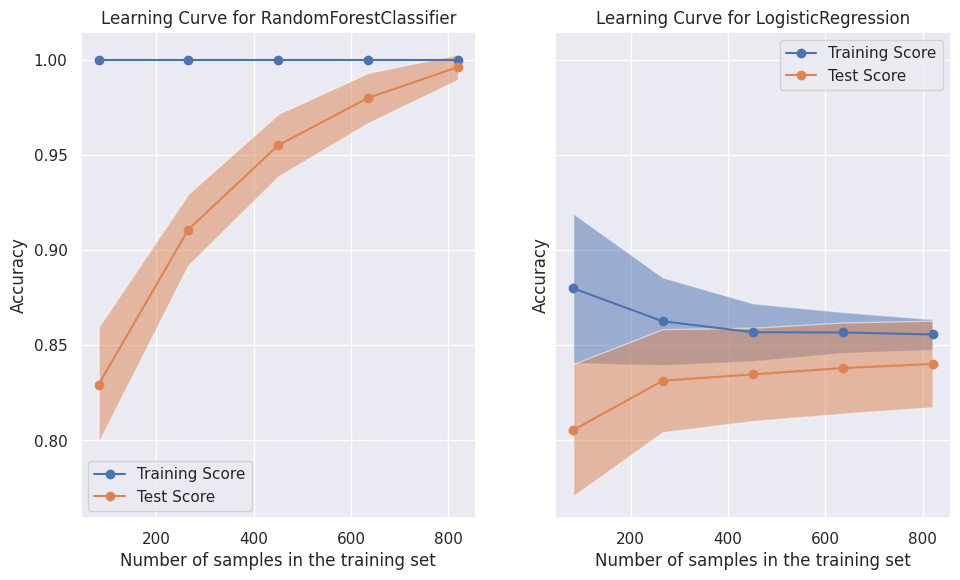

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rf, logreg]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

##**Create the ROC analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Predict the probabilities for the positive class
y_pred_rf = rf.predict_proba(x_test)[:, 1]
y_pred_logreg = logreg.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC scores
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_logreg = roc_auc_score(y_test, y_pred_logreg)

print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Logistic Regression: {auc_logreg}")

AUC-ROC for Random Forest: 0.9325147534742052
AUC-ROC for Logistic Regression: 0.8787359604035789


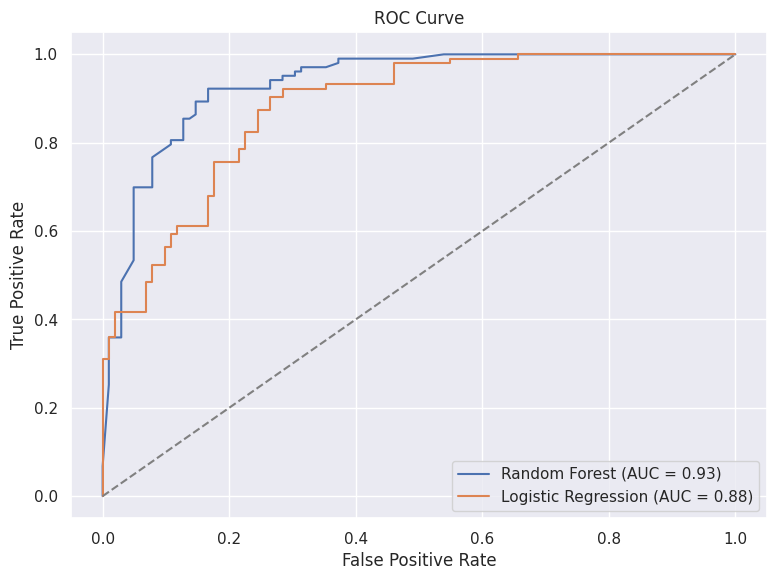

In [ ]:
def plot_roc_curves(y_test, y_pred_rf, y_pred_logreg):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)

    # Plot ROC curves
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_rf, y_pred_logreg)


Bedasarkan ROC curve diatas pada model random forest menghasilkan nilai AUC-ROC yang mendekati 1 yaitu 0.93 dan pada model logistic regression menghasilkan AUC-ROC sebesar 0.88 yang dapat diartikan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Sehingga semakin mendekati nilai 1, maka semakin baik kinerja model dalam membedakan antara kelas positif dan negatif.

In [ ]:
from sklearn.metrics import confusion_matrix

def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)


fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)

summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR_RF': fpr_rf,
    'TPR_RF': tpr_rf,
    'FPR_LogReg': fpr_logreg,
    'TPR_LogReg': tpr_logreg,
})

print(summary_df)

    Threshold    FPR_RF    TPR_RF  FPR_LogReg  TPR_LogReg
0         0.0  0.705882  1.000000    1.000000    1.000000
1         0.1  0.401961  0.990291    0.450980    0.932039
2         0.2  0.372549  0.990291    0.411765    0.932039
3         0.3  0.303922  0.961165    0.362745    0.932039
4         0.4  0.264706  0.941748    0.343137    0.922330
5         0.5  0.186275  0.922330    0.264706    0.902913
6         0.6  0.166667  0.893204    0.225490    0.786408
7         0.7  0.078431  0.757282    0.176471    0.699029
8         0.8  0.049020  0.640777    0.098039    0.553398
9         0.9  0.029412  0.359223    0.068627    0.417476
10        1.0  0.000000  0.000000    0.000000    0.000000


##**Select the model that you think performs the best and give a justification of why you think the model is the best for the study case you choose**

Berdasarkan hasil perbandingan antara model random forest dengan model logistic regression, yang lebih dominan mempunyai performa yang lebih baik yaitu terdapat pada model random forest yang di lihat dari hasil akurasi cross validation dan bootstraping yang tinggi, lalu
hasil evaluasi matrix random forest yang tinggi dibandingkan dengan model logistic regression, setelah itu perbandingan akurasi menggunakan hyperparameter tuning dari kedua model menghasilkan akurasi yang cukup tinggi pada model random forest. Kemudian berdasarkan AUC-ROC score yang memiliki score yang cukup tinggi terdapat di model random forest. Sehingga random forest memungkinkan model dapat mempredikasi dengan akurasi yang tinggi dan menghindari overfitting, lalu dapat memberikan informasi tentang fitur mana yang paling penting dalam membuat prediksi yang dapat membantu memahami faktor-faktor yang memengaruhi risiko penyakit jantung.
